# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    #location = 'E:\\Documents\\Dan\\Code\\Prospectus\\Document\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    location = 'C:\\Users\\Hendrickson\\Desktop\\Phone Acceleration\\3'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

In [2]:
#Extra Headers:
import DWFT as fp
import os as os
import pywt as py
import statistics as st
import os as os
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency
from time import time as ti

my_cmap = plt.get_cmap('gray')

In [3]:
#DataSet = np.genfromtxt(open('./Data/Jeep SD 10.txt','r'), delimiter=',',skip_header=4)
Header = np.array(['Top1', 'Top2','Top3']) #','Z1','X2','Y2','Z2'])
#Header = np.array(['Date', 'Hour', 'Minute', 'Second', 'Sec Fraction', 'Sen0x', 'Sen0y', 'Sen0z', 'Sen1x', 'Sen1y', 'Sen1z', 'Sen2x', 'Sen2y', 'Sen2z', 'Sen3x', 'Sen3y', 'Sen3z', 'Sen4x', 'Sen4y', 'Sen4z', 'Sen5x', 'Sen5y', 'Sen5z'])


fig=plt.figure(figsize=(6.67,3.75))
plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
plt.plot(DataSet[:,0],DataSet[:,3], label = 'Z')
plt.plot(DataSet[:,0],DataSet[:,4], label = 'R')

title = '4 Magnitude Acceleration Curves'
if Ledgends: plt.legend()
if Titles: plt.title(title)
if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
plt.show()

In [4]:
def PlotFingerPrint(data, xName='a', title='', FP='mexh',scales = 50, slices=10, trim=0):
    
    FpScat=fp.getLabeledThumbprint(data, FP,scales,slices)
    #print(np.shape(data)[1], scales)
    if xName == 'a':
        xName = np.arange(0,np.shape(FpScat)[1]-2*trim,1)
    if trim == 0:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))
    else:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))

    

    fig1 = plt.figure(figsize=(6.67,3.75), dpi=600)
    ax1 = plt.axes()
    if trim == 0:
        cs1 = ax1.contourf(Al,Ms, FpScat[:,:],cmap=my_cmap,levels=slices)
    else:
        cs1 = ax1.contourf(Al,Ms, FpScat[:,trim:-trim],cmap=my_cmap,levels=slices)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()

Top1 nan nan 159999
Top1 Smoothed nan nan 159999


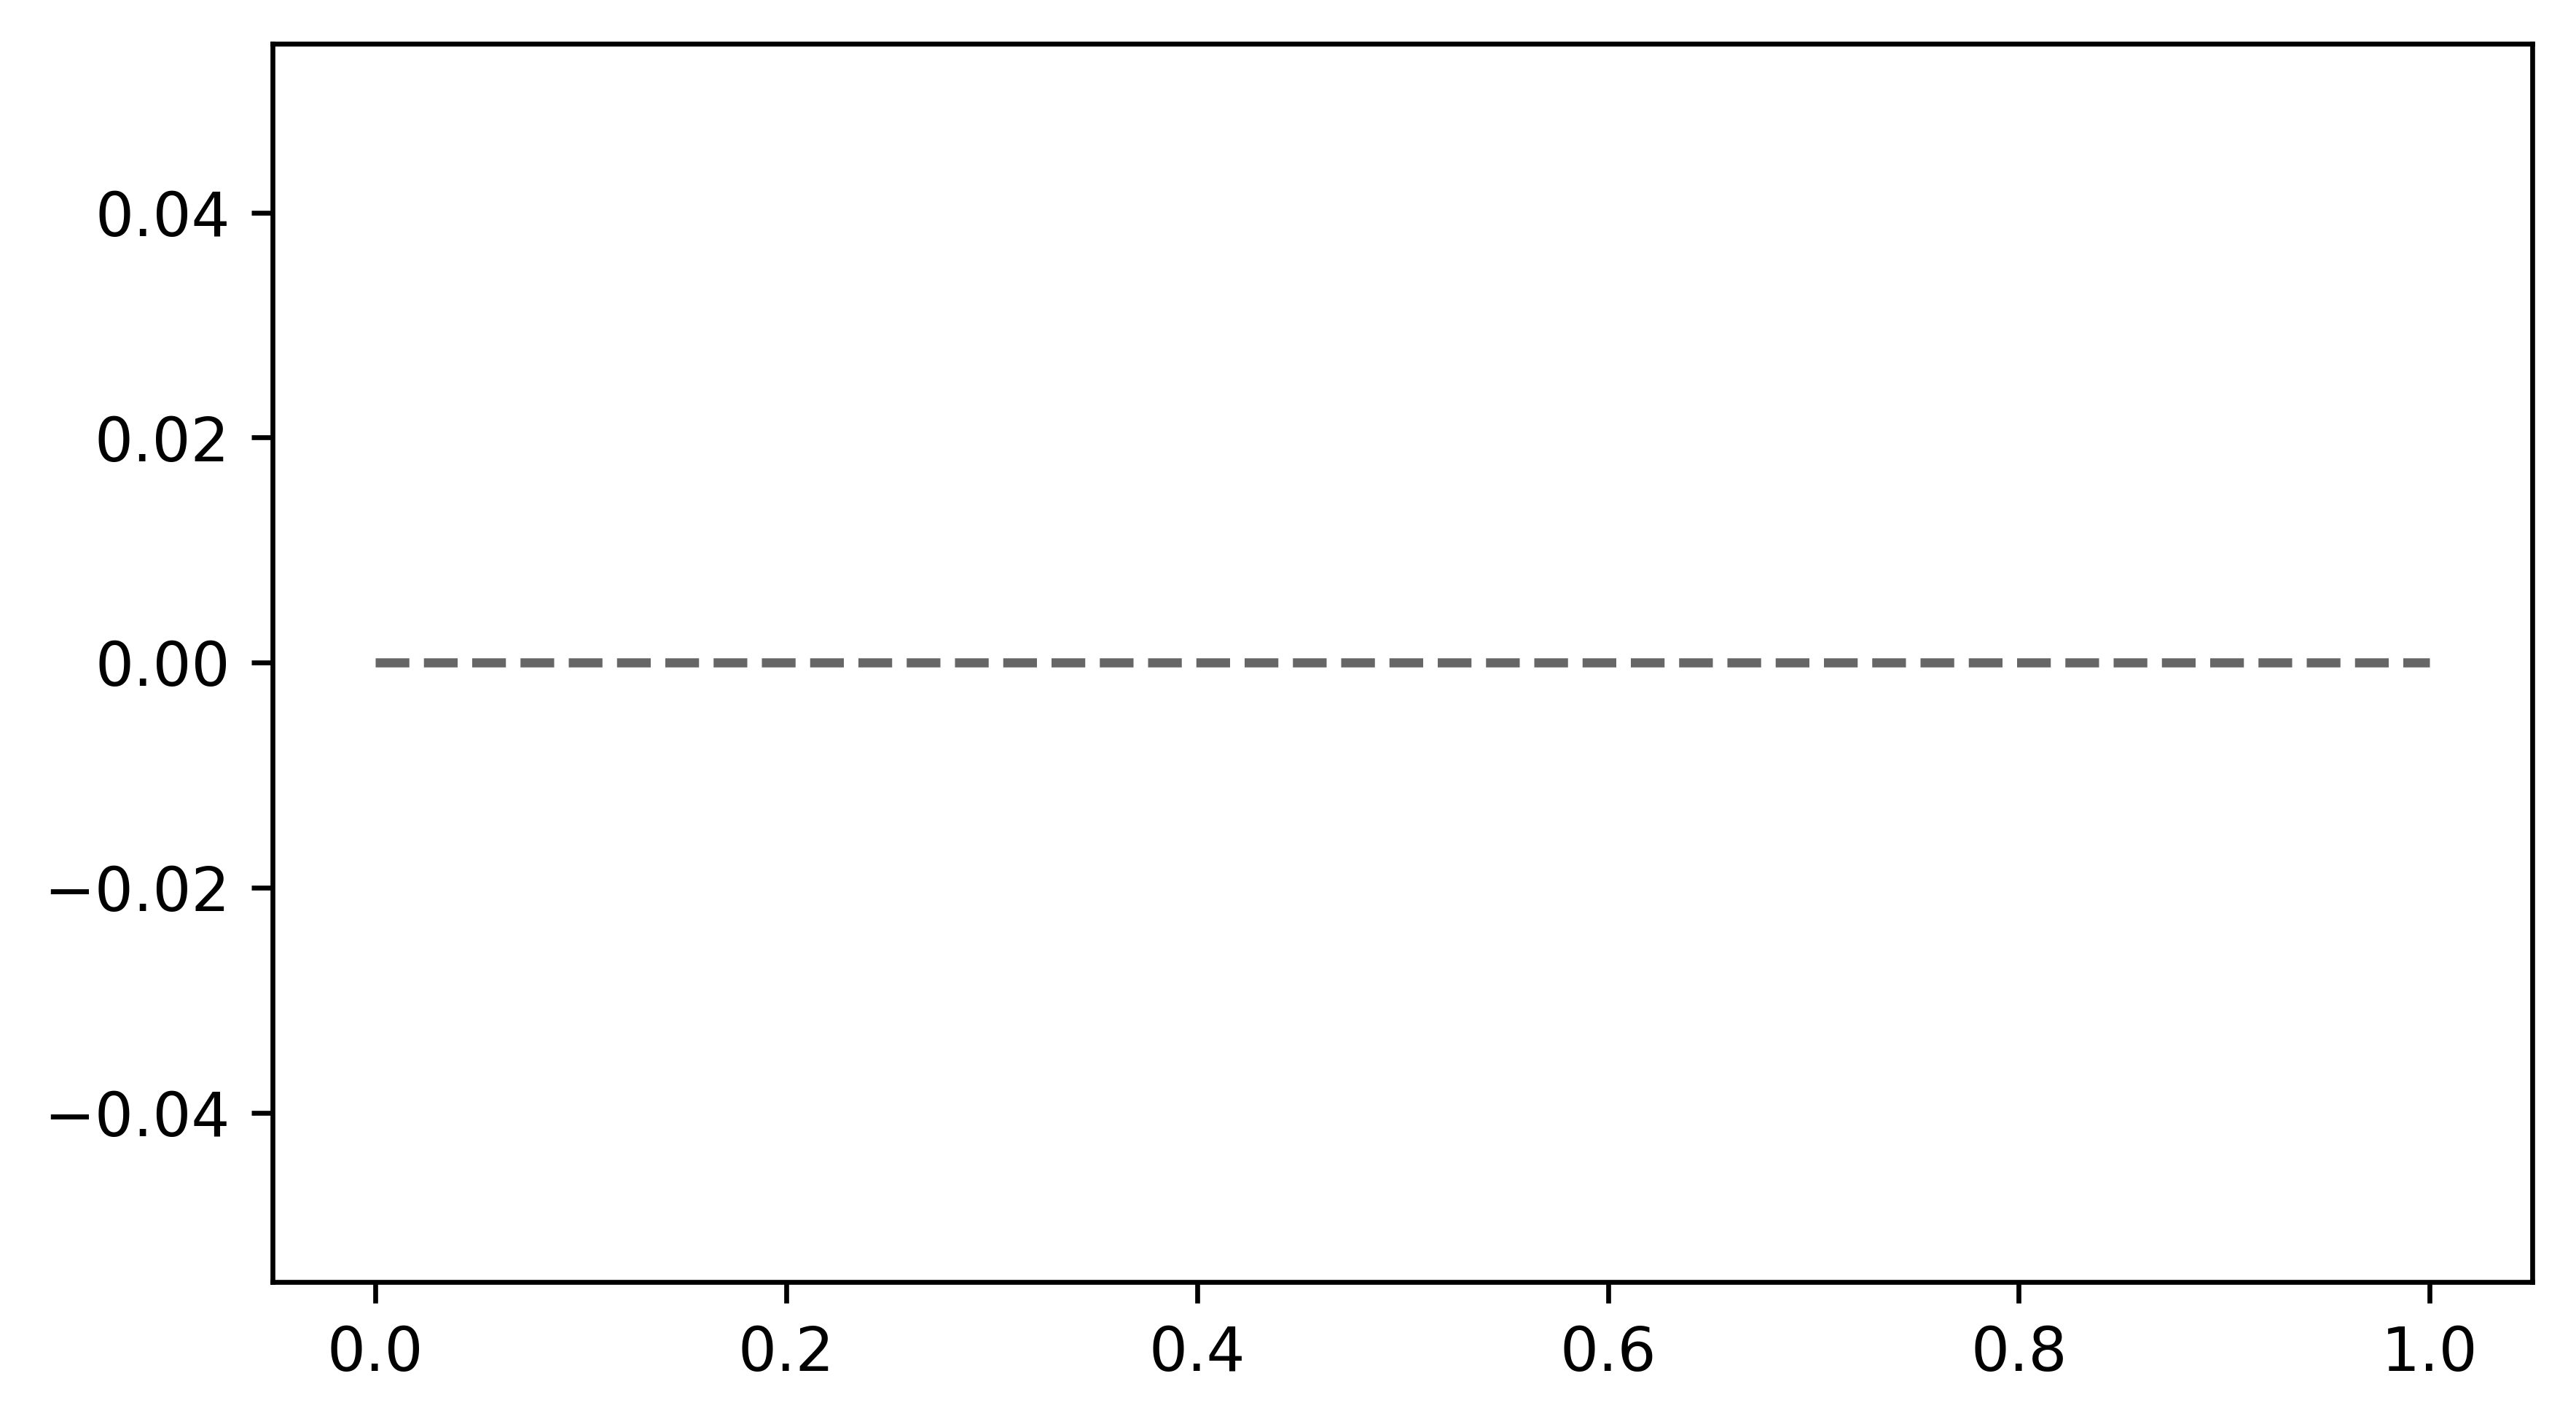

Top2 nan nan 159999
Top2 Smoothed nan nan 159999


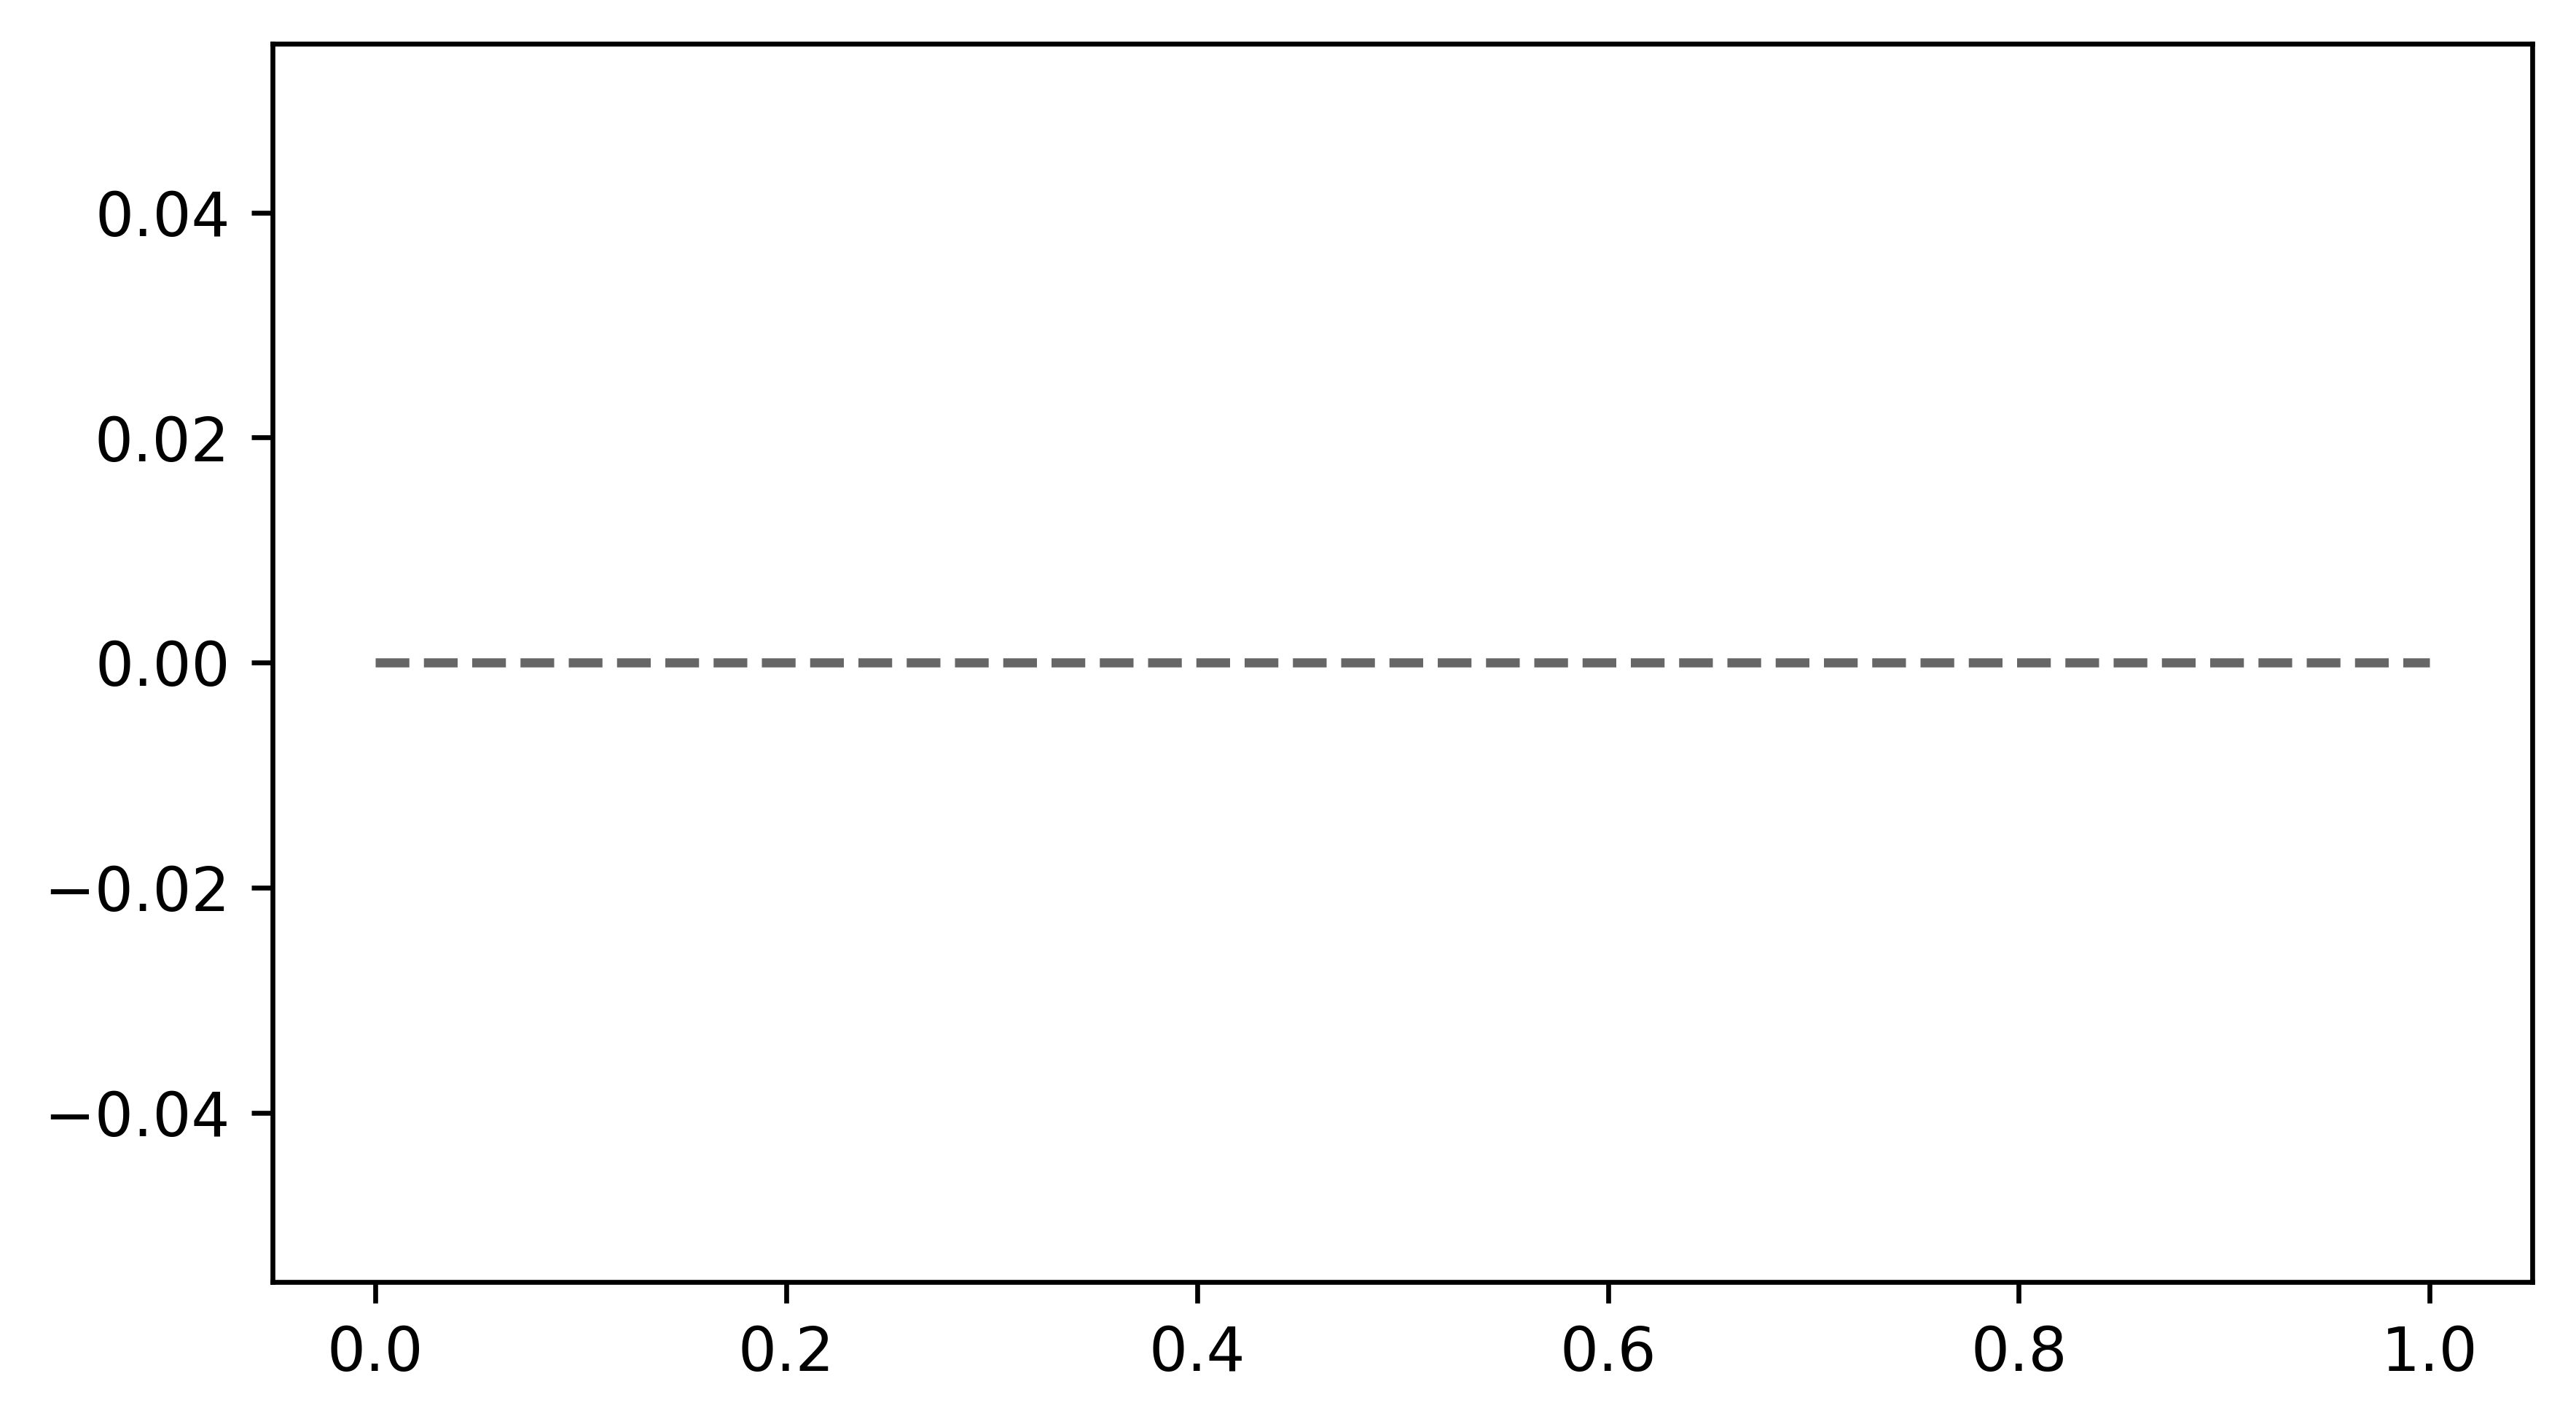

Top3 0.0003266608192863772 0.0004943951598875776 1874
Top3 Smoothed 5.78039883061759e-05 6.328041368988071e-05 472


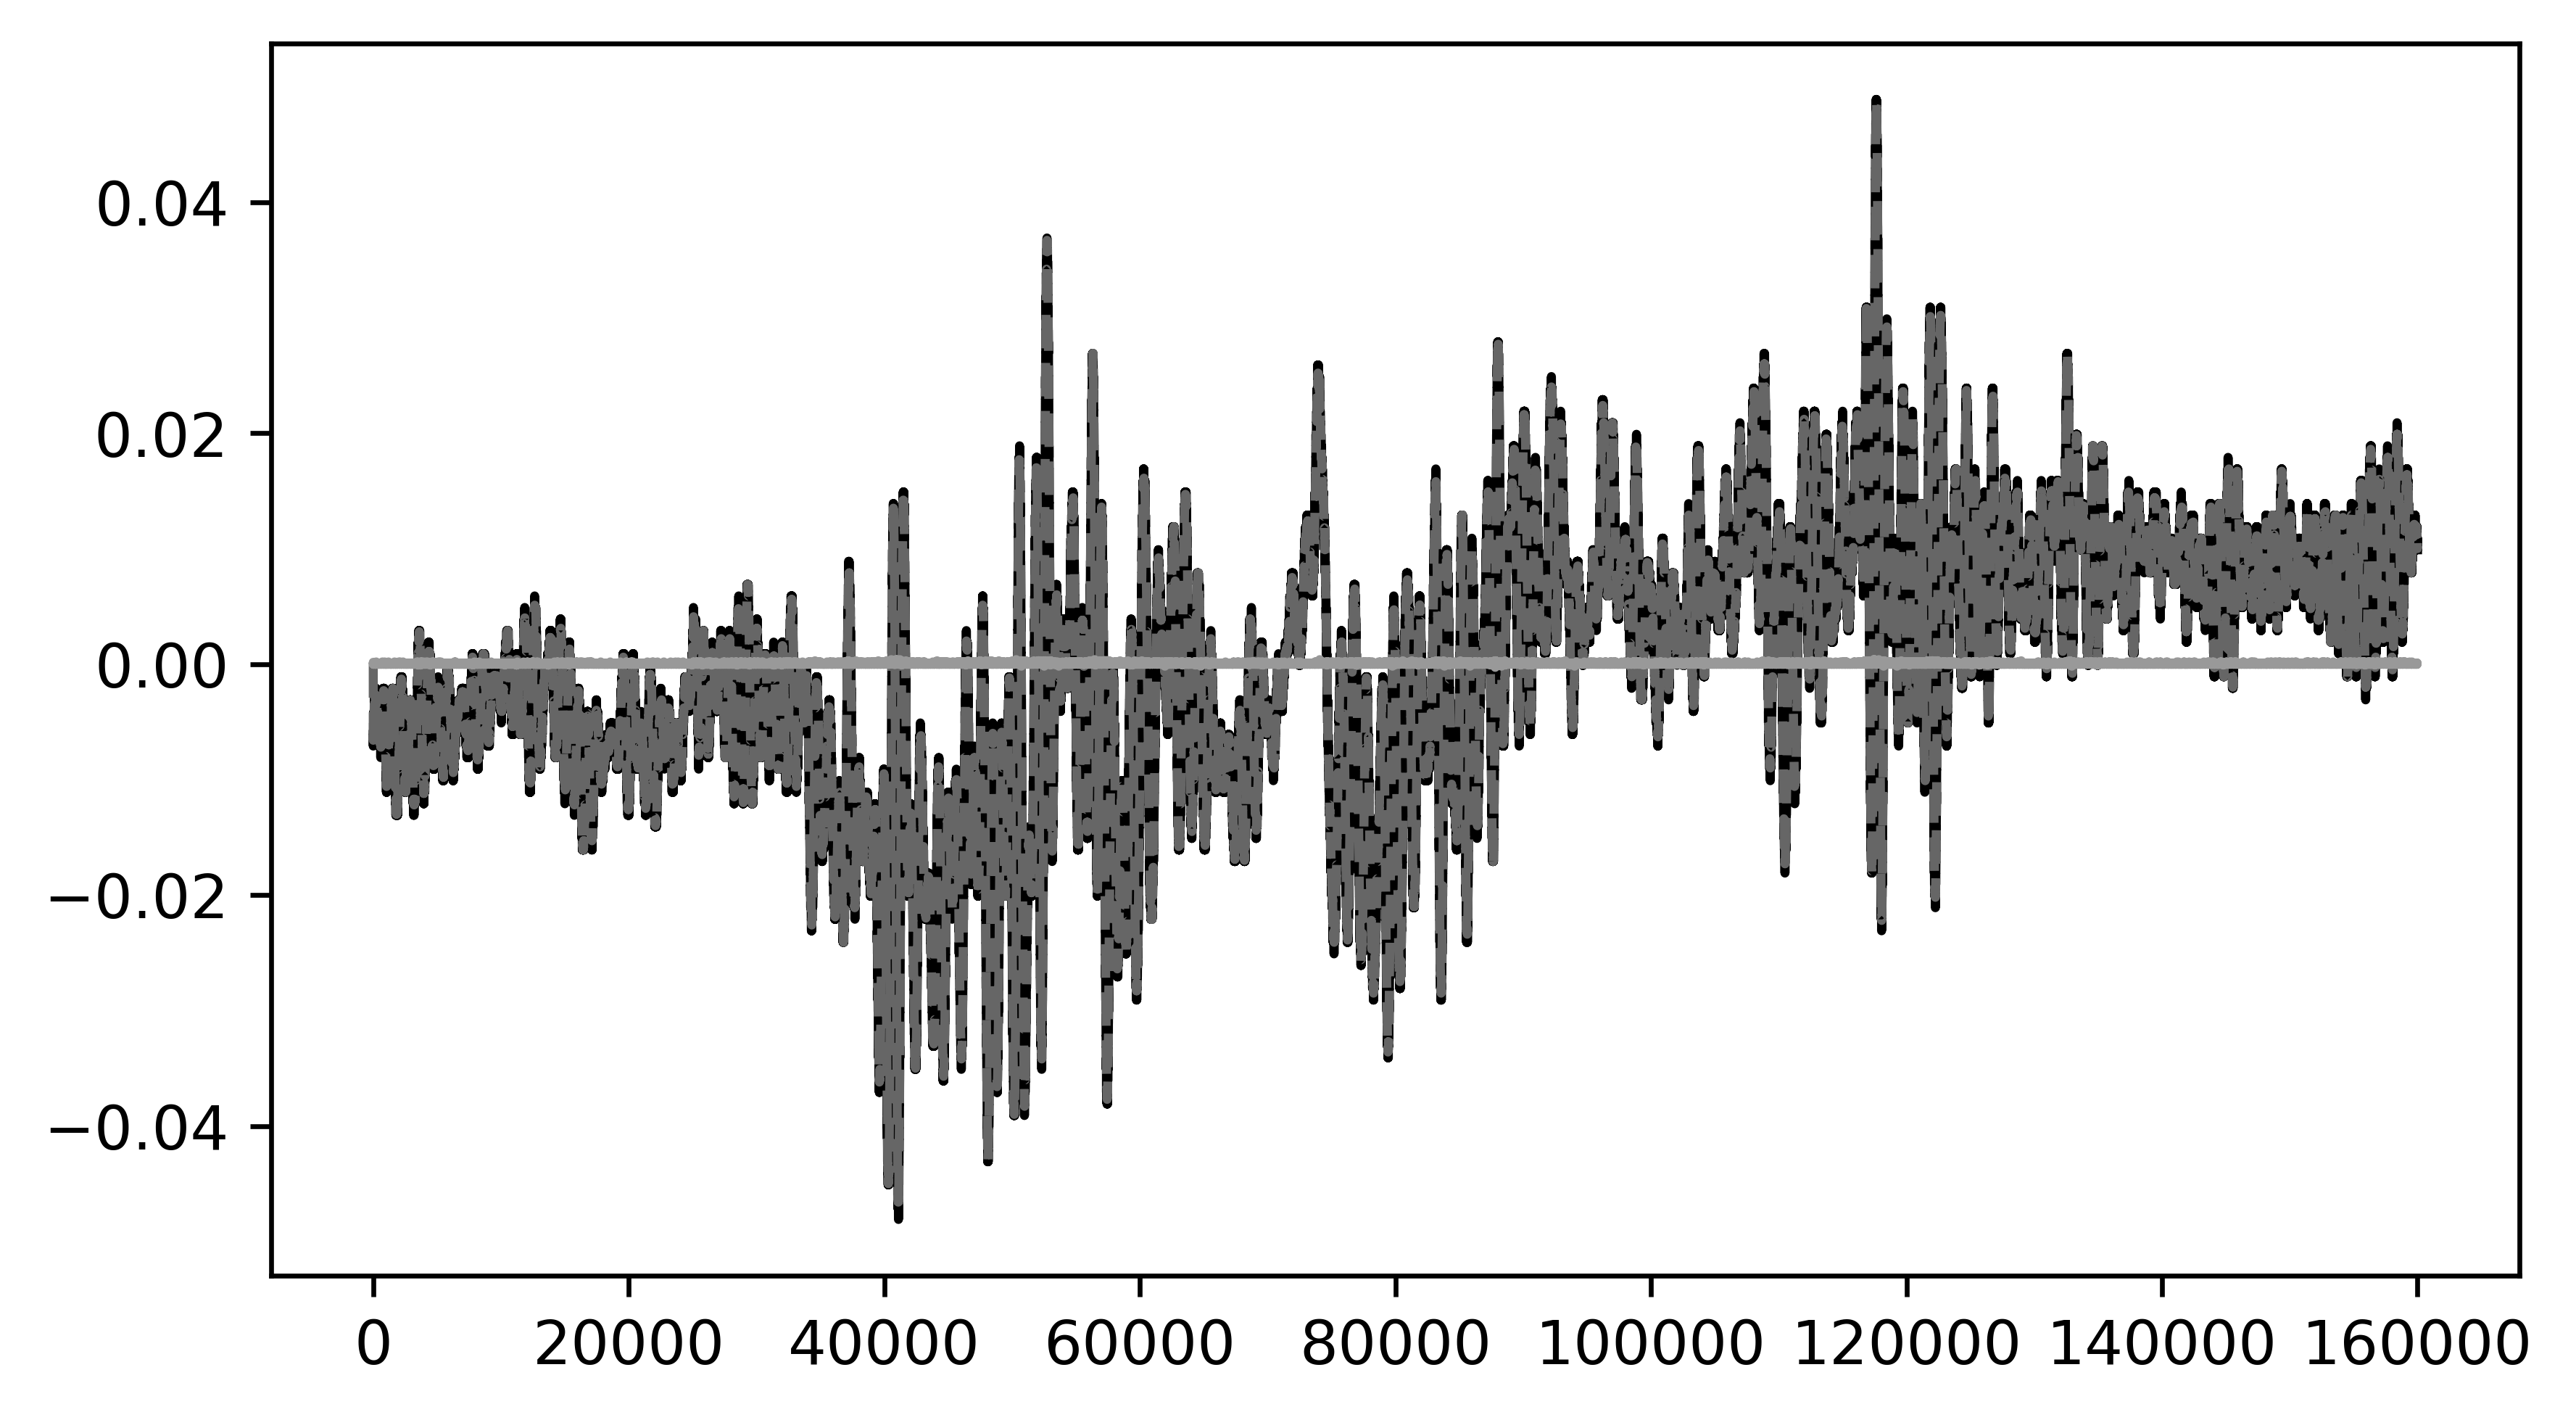

In [5]:
# Directory = './Data'
Directory = 'C:\\Users\\Dan\\Desktop\\Temp\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(Directory)

#files = random.sample(files,2)

# Reorder_cycler = (cycler('color', ['0.00', '0.70', '0.40', '0.90']) + cycler(linestyle=['-', '--', ':', '-.']))
# plt.rc('axes', prop_cycle=Reorder_cycler)

#start = 1538500
#end  =   start + 5000 #1649552
#start = 54000
#end = 56000
start = 0
end = 160000

size = 5000
Arange = 10
coord = 2

Saving = True
location = Directory
Titles = False

for Filename in files:
    if Filename[-4:] ==  '.csv':
        ODataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=1)
        ODataSet = ODataSet[start:end,:]
        length = np.shape(ODataSet)[0]

        #Header = ODataSet[0,:]


        #SmoothRDataSet = np.zeros(np.shape(ODataSet)[0])
        SmoothXDataSet = np.zeros((np.shape(ODataSet)[0],18))
        #TdDataSet = np.zeros(np.shape(ODataSet)[0])

        results =[]
        Results = []
        #fig=plt.figure(figsize=(6.67,3.75), dpi=1200)

        
       

        #for i in range(int(length/size)):
        for i in range(3):
            fig=plt.figure(figsize=(6.67,3.75), dpi=600)
            # StdDev = np.zeros(length)
            # StdDevSmooth = np.zeros(length)
            coord = i#+5
            results =[]
            signchange = 0
            sign=1

            norm = np.average(ODataSet[:,coord])
            ODataSet[:,coord]-=norm

            for j in range(np.shape(ODataSet)[0]-1):
                if sign != np.sign(ODataSet[j+1,coord]*ODataSet[j,coord]):
                    signchange+=1
                    sign = np.sign(ODataSet[j+1,coord]*ODataSet[j,coord])
                results.append(sign*np.abs(np.abs(ODataSet[j+1,coord])-np.abs(ODataSet[j,coord])))
            print(Header[coord],np.average(results),st.stdev(results),signchange)
            Results.append(results)
            # SmoothRDataSet[0] = 0
            SmoothXDataSet[0] = 0
            # StdDev[0]=0
            # StdDevSmooth[0]=0

            # factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            # TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            # TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            # for j in range(Arange-1):
            #     k = j+2
            #     TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            # for j in range(length-Arange):
            #     k = (length-1)-j
            #     TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                SmoothXDataSet[k,i] = np.average(ODataSet[0:k,coord])
            #     #StdDev[k]=st.stdev(ODataSet[0:k,coord])
            #     StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
            #     SmoothRDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                SmoothXDataSet[k,i] = np.average(ODataSet[k-Arange:k,coord])
            #     #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
            #     StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
            #     SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
            signchange = 0
            sign=1
            results =[]
            for j in range(np.shape(ODataSet)[0]-1):
                if sign != np.sign(SmoothXDataSet[j+1,i]*SmoothXDataSet[j,i]):
                    signchange+=1
                    sign = np.sign(SmoothXDataSet[j+1,i]*SmoothXDataSet[j,i])
                results.append(sign*np.abs(np.abs(SmoothXDataSet[j+1,i])-np.abs(SmoothXDataSet[j,i])))
            print(Header[coord]+' Smoothed',np.average(results),st.stdev(results),signchange)
            plt.plot(ODataSet[:,coord], label = 'Original ' + Header[coord])
            plt.plot(SmoothXDataSet[:,i], label = 'Smooth ' + Header[coord])
            plt.plot(results[:], label = 'Changes')
            # #plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            # #plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')
            
            # plt.legend()            
            plt.show()
            # #print(title,max(StdDev),max(SmoothXDataSet[start:end]))
        
        # title = Filename #+ ' ' + Header[coord]
        # if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        
        # if Ledgends: plt.legend()
        # if Titles: plt.title(title)
        
        

        #plt.show()
        
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

# Saving = False
# Titles = True

#title='Highlighted Sensor Dimmension'
#fig=plt.figure(figsize=(6.67,3.75), dpi=1200)
#plt.plot(ODataSet[start:end,3], label = 'Original ' + Header[3])
#if Ledgends: plt.legend()
#if Titles: plt.title(title)
#if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
#plt.show()

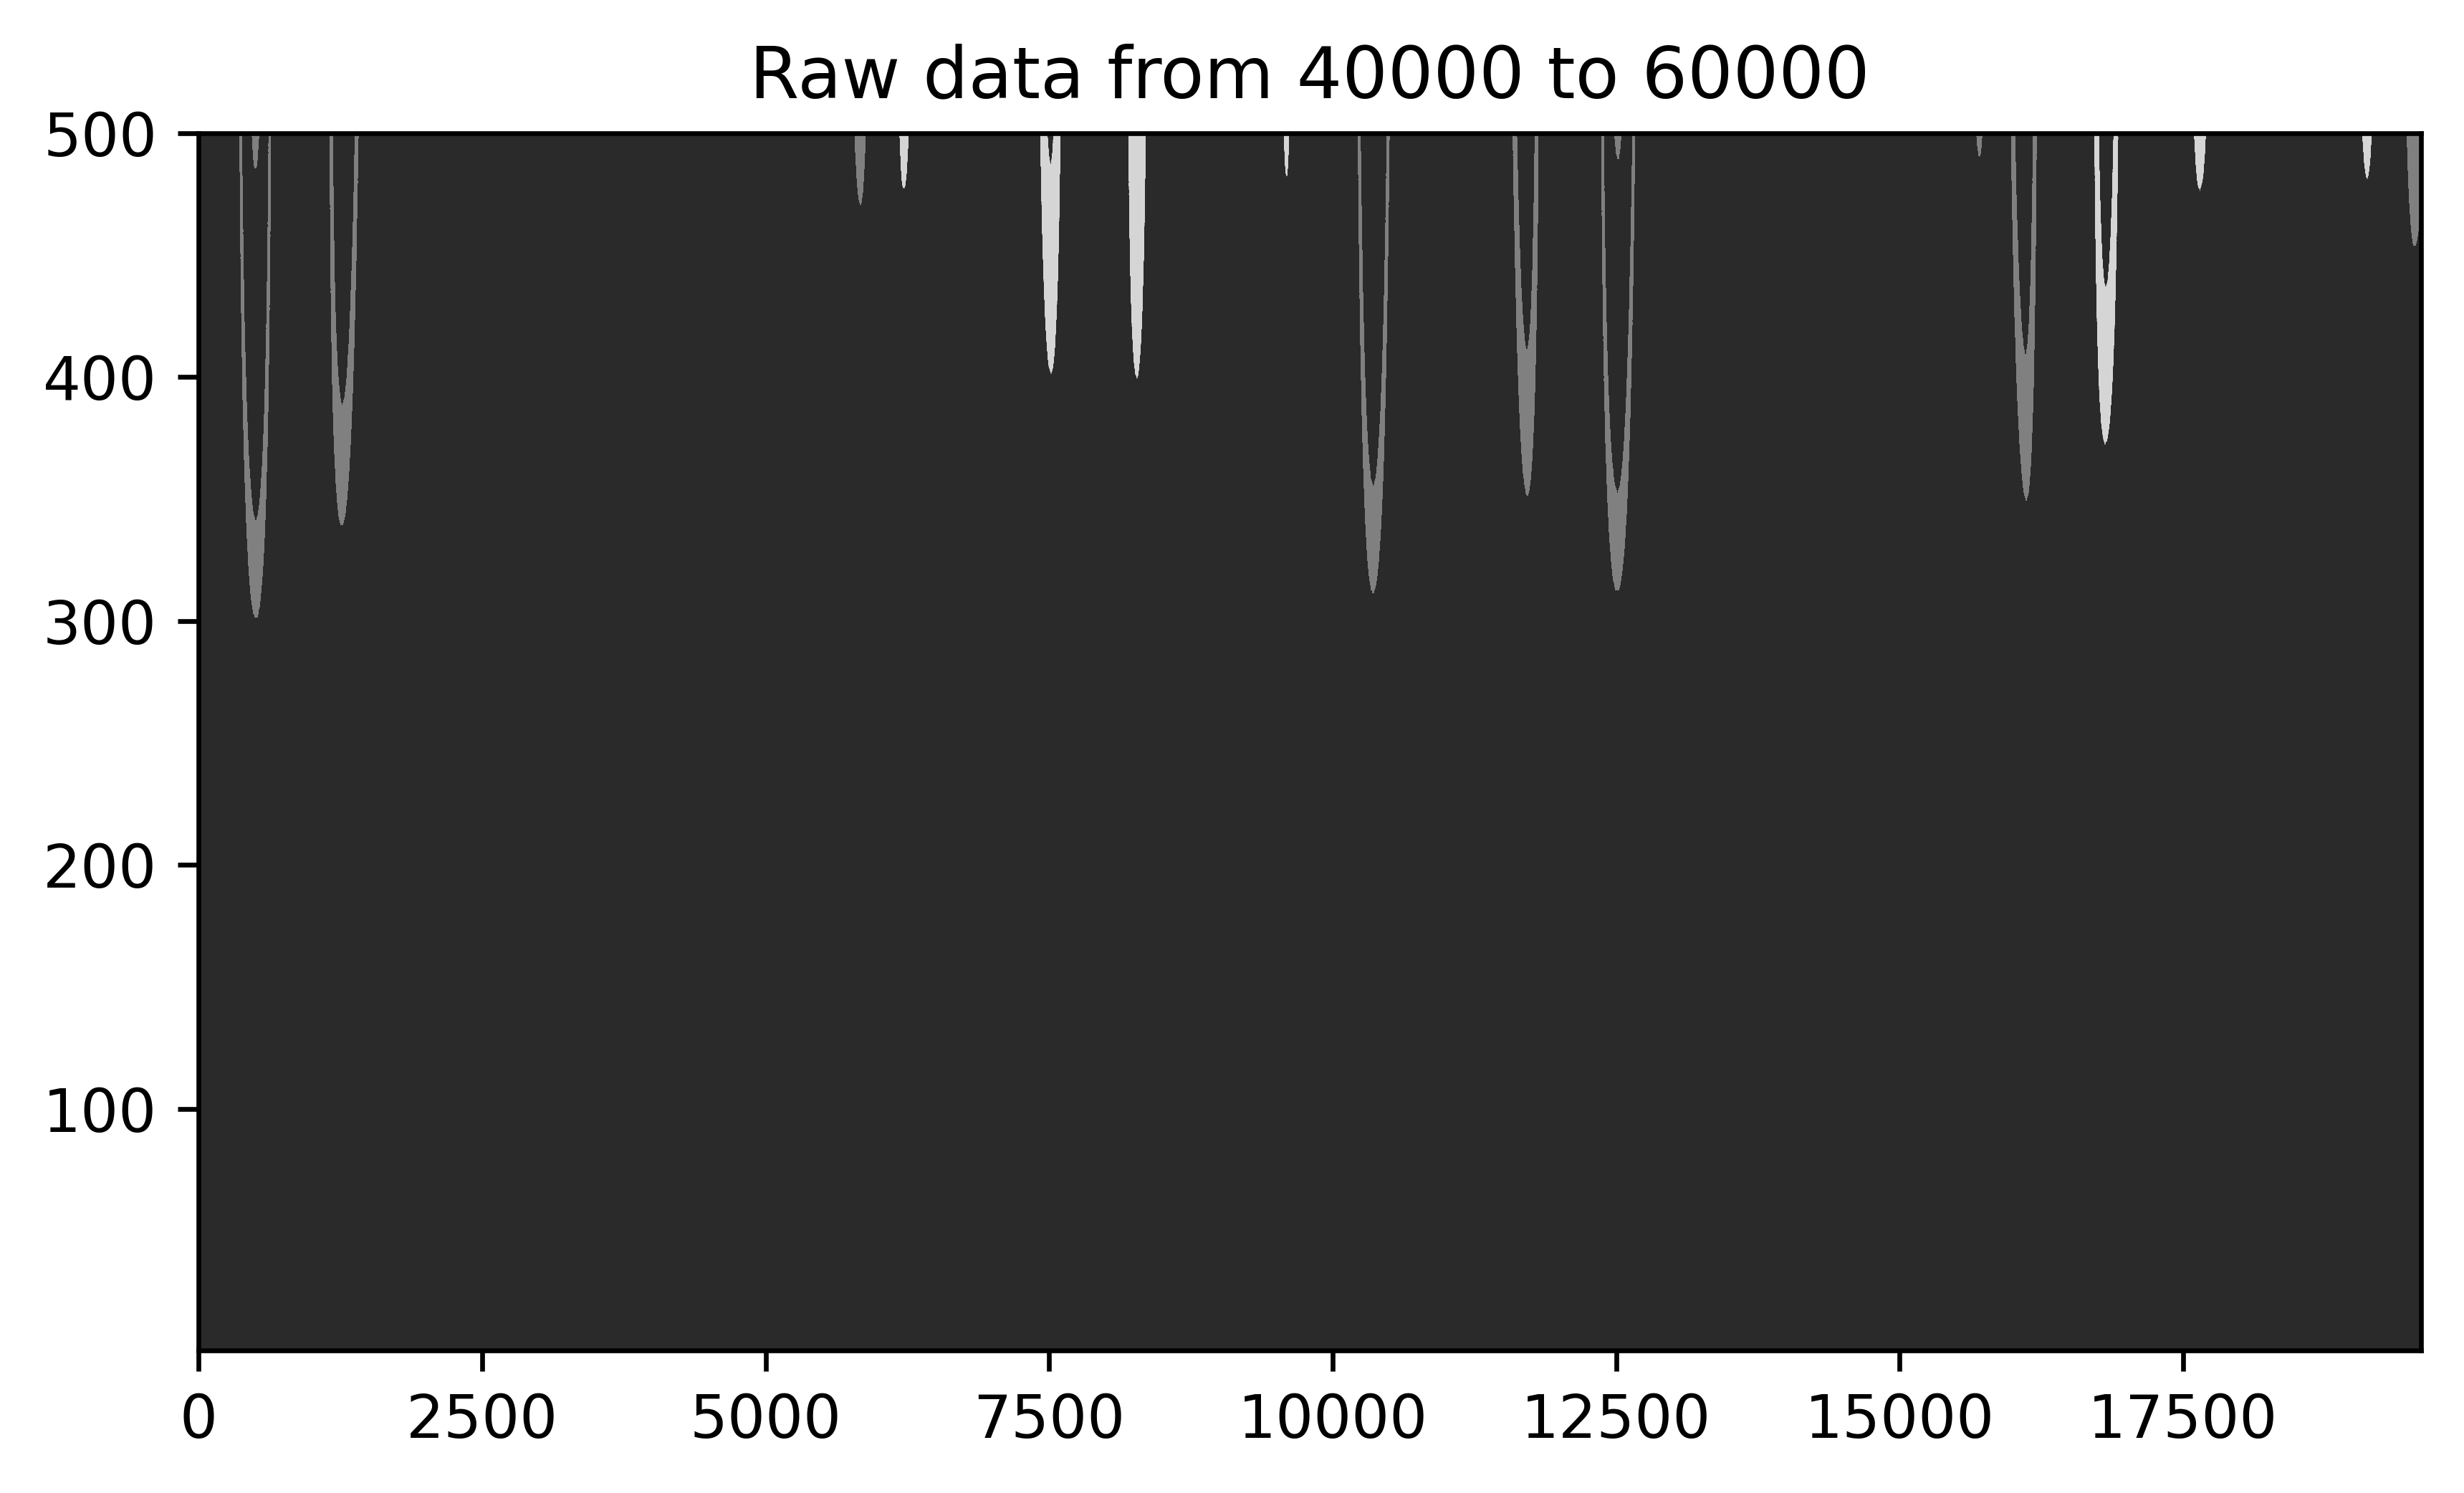

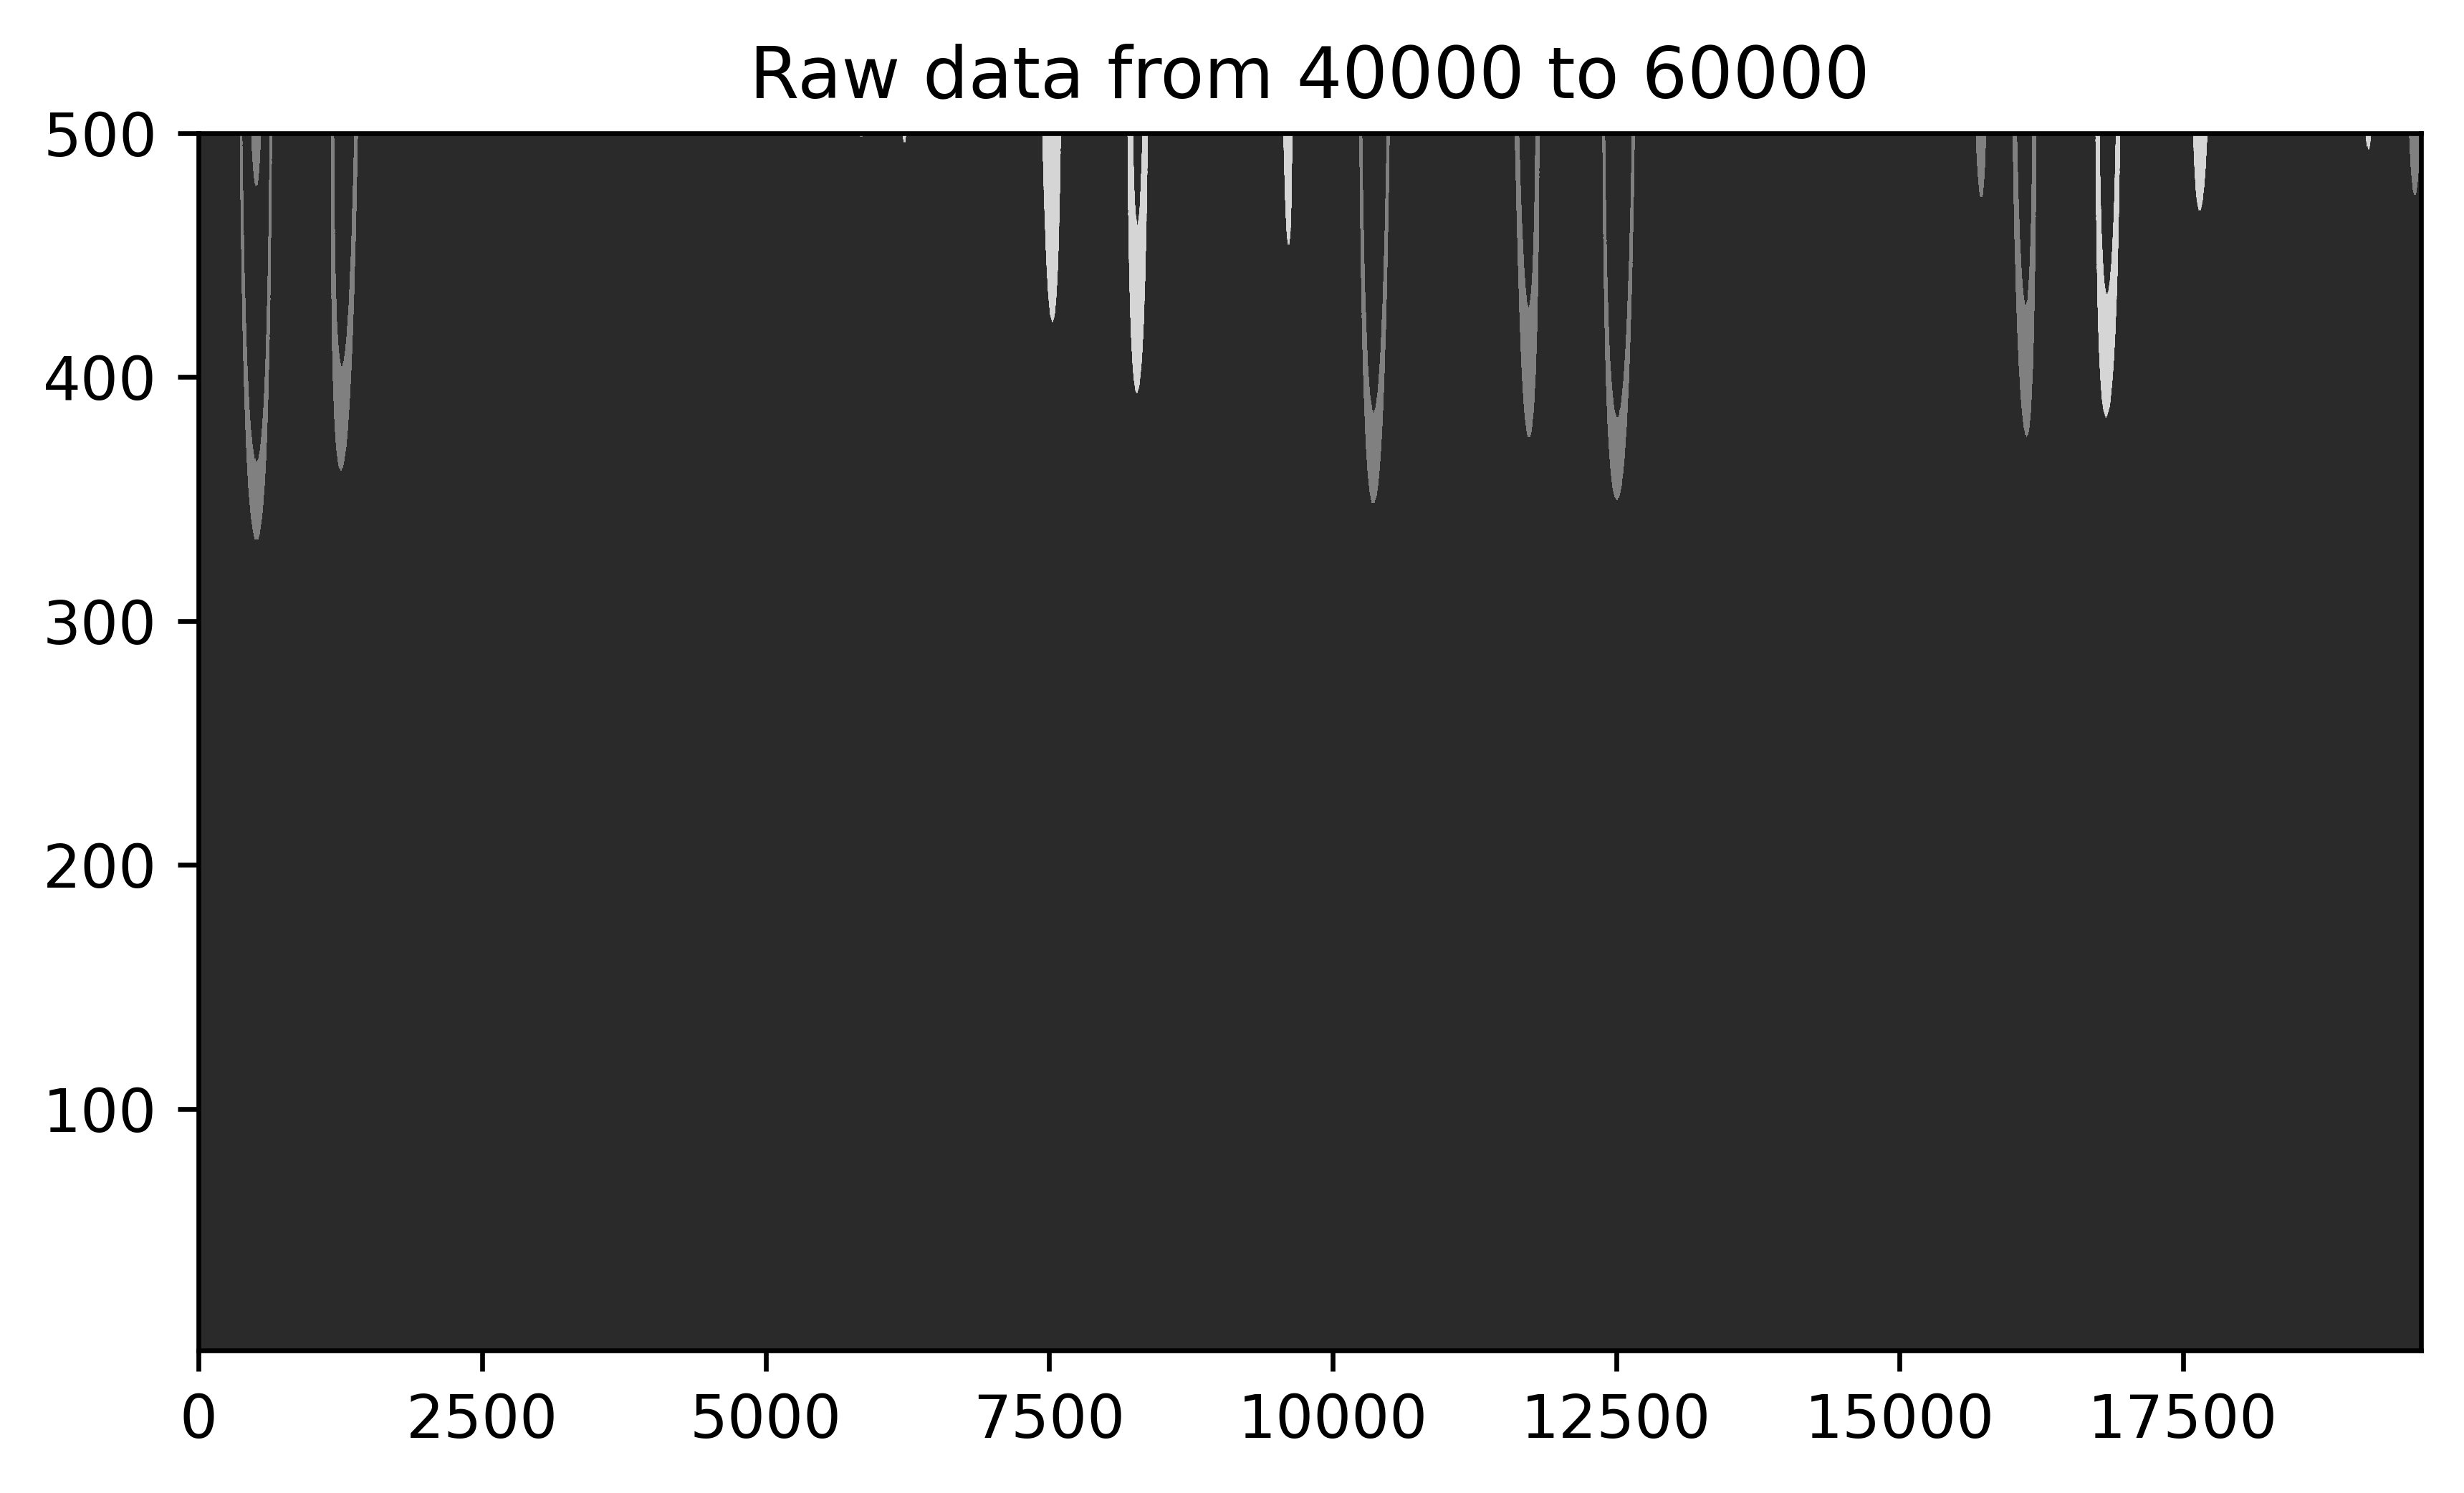

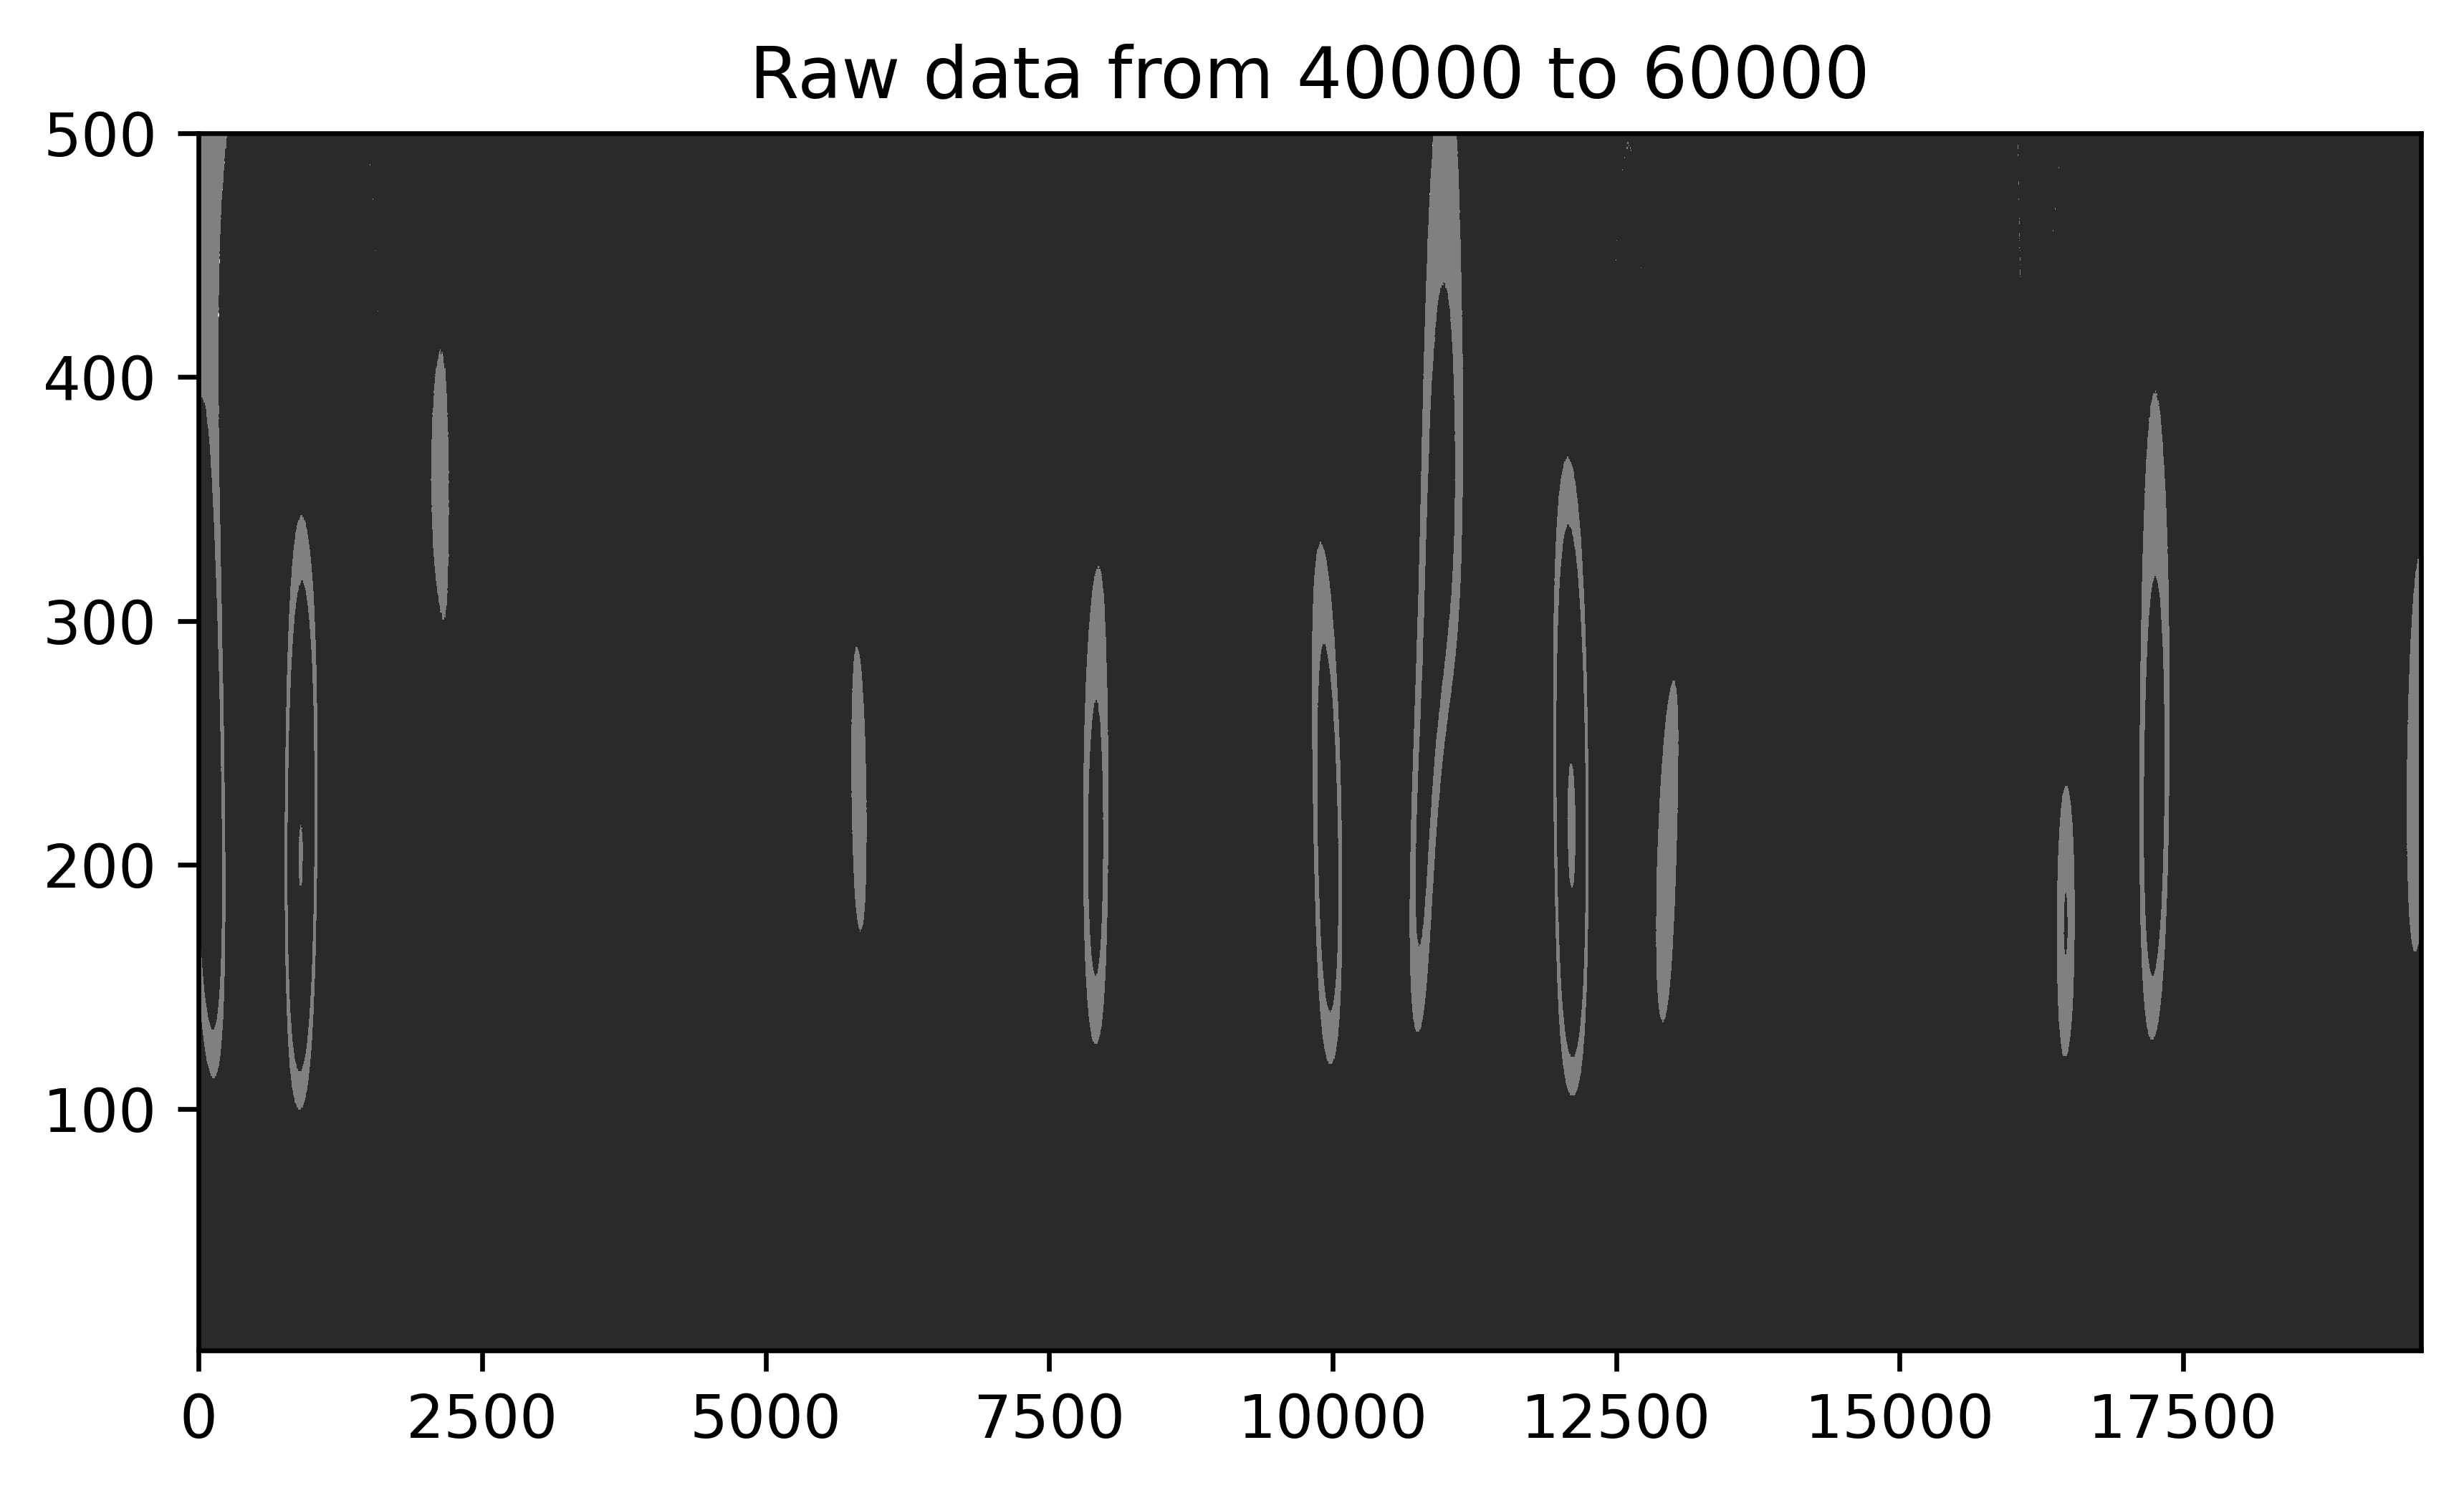

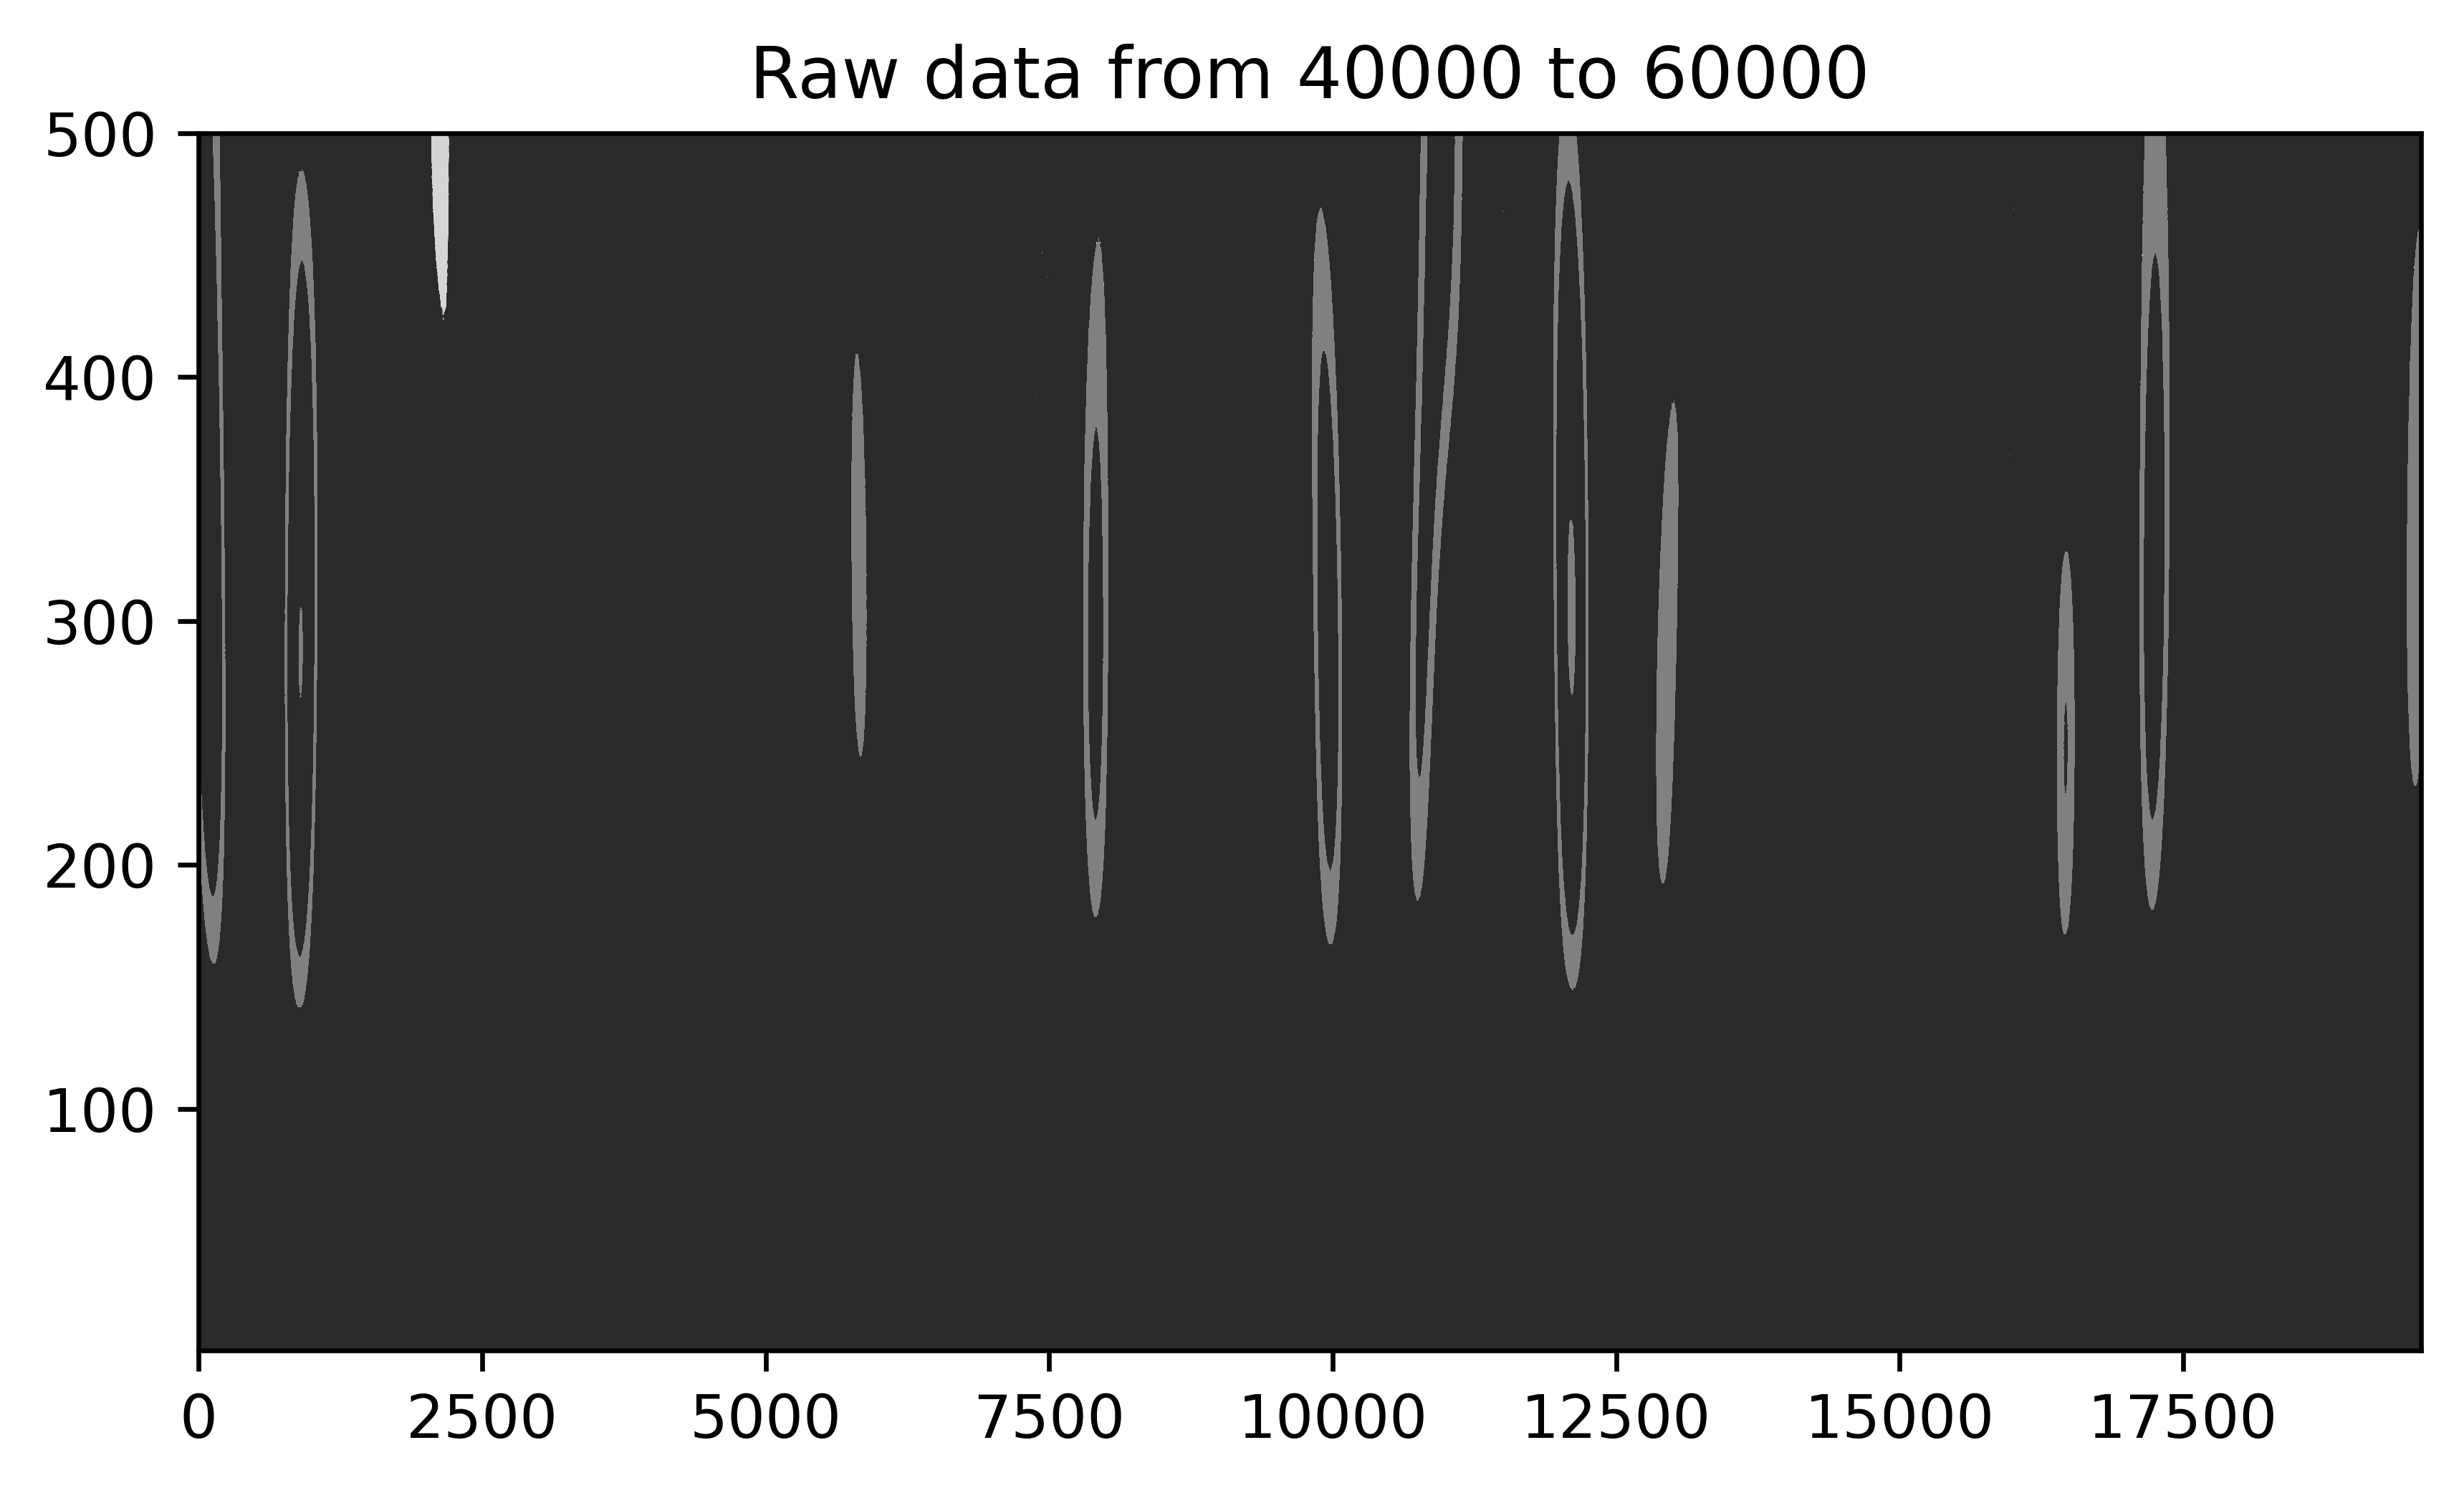

In [15]:
trys = ['coif1','coif2','mexh','gaus2','dmey','gaus1','morl','cgau1','cgau2','db1','db2','sym1','sym2','sym3']
#trys = ['coif2','mexh','gaus2','db1','sym2']
#trys = ['gaus2'] #,'gaus1','gaus2','gaus3','gaus5']
wvlt = 'gaus2'

Titles = True
Saving = False

start = 40000
end = 60000
coord = 1
scales = 500
slices = 2
trim = 200

for cord in range(1):
   coord = cord + 2
   for id in trys:
      try:
       
            PlotFingerPrint(ODataSet[start:end,coord],'a','Raw data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            # PlotFingerPrint(SmoothXDataSet[start:end,cord],'a','Smoothed data from '+str(start+trim)+' to '+str(end-trim)+', '+id+' wavelet, '+Header[coord],id,scales,slices,trim)
            # PlotFingerPrint(StdDev[start:end],'a',id + 'StdDev from '+str(start)+' to '+str(end),id,scales,slices,trim)
            # PlotFingerPrint(StdDevSmooth[start:end],'a',id + 'Wavelet from '+str(start)+' to '+str(end),id,500,5)
            # PlotFingerPrint(TdDataSet[start:end],'a',id + 'Wavelet on r series from '+str(start)+' to '+str(end),id,500,5)
            # PlotFingerPrint(SmoothDataSet[start:end],'a','Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)
            
      except:
         print(id)

In [7]:
np.shape(ODataSet[start:end,coord])

(5000,)

In [8]:
# #y = np.linspace(0, BeamLength, np.shape(CenterZResults[0][0])[1])
# #x = np.linspace(0, BeamHeight, np.shape(CenterZResults[0][0])[0])

# import matplotlib.animation as animation

# fig = plt.figure(figsize=(6.67,3.75), dpi=300)

# y = np.linspace(0, scales-1, scales)
# x = np.linspace(0, 1000, num=1000, endpoint=False)
# x,y = np.meshgrid(x,y)

# plt.ylabel(r'scales')
# plt.xlabel(r'data points')

# def animate(i):
    
#     #if 'ax' in locals: ax.clear()
#     start = i * 250
#     end = start + 1000 

#     z = np.matrix(FpScat[:,start:end])
#     plt.title('Data Points ' +str(start) + ' : ' + str(end))
#     cont = plt.contourf(x, y, z, levels=scales, cmap='gray',vmin=-0, vmax=18935)
#     #plt.axes.clear()
#     #ax = plt.axes(xlim=(start, end), ylim=(0, scales))  
#     #time.sleep(1)
#     return cont  

# for i in range(18):
#     coord = i+5
#     FpScat = fp.getLabeledThumbprint(ODataSet[start:end,coord], wvlt,scales,slices,0.12,'both',True)
#     PlotFingerPrint(FpScat,'a',Filename[:-4] + ' Wavelet on r series from '+str(start)+' to '+str(end),id,scales,slices,trim)
    
#     anim = animation.FuncAnimation(fig, animate, frames=17)
#     anim.save('animation-'+ Header[coord] +'.gif')

In [9]:
# yy = np.linspace(0, scales, scales+1)
# xx = np.linspace(250, 1250, num=1000, endpoint=False)
# xxx,yyy = np.meshgrid(xx,yy)
# yyy

In [10]:
# PlotFingerPrint(FpScat,'a',Filename[:-4] + ' Wavelet on r series from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [11]:
# FpScatR = fp.getLabeledThumbprint(SmoothRDataSet[start:end], wvlt,scales,slices)

In [12]:
# PlotFingerPrint(FpScatR,'a',Filename[:-4] + ' Smoothed r data from '+str(start)+' to '+str(end),id,scales,slices,trim)

In [13]:
# FpScatX = fp.getLabeledThumbprint(SmoothXDataSet[start:end], wvlt,scales,slices)

In [14]:
# PlotFingerPrint(FpScatX,'a','Smoothed X data from '+str(start)+' to '+str(end),id,scales,slices,trim)